# Experiment parameters

In [1]:
import numpy as np
from utils import (
    grid_adj_mat,
    grid_gos_mat,
    ring_adj_mat,
    ring_gos_mat,
    star_adj_mat,
    star_gos_mat,
)

In [2]:
n_one = 30  # number of rows in each of the matrices held by agents
d = 20  # ambient dimension
mat_mean = 5.0  # mean of each matrix entry
mat_std = 2.0  # std of each matrix entry
num_iter_solution = 50000  # max number of iterations for finding saddle with extragradient
max_time_solution = 3600  # max time for finding saddle with extragradient
tolerance_solution = 1e-10  # tolerance of solution obtained with extragradient
eps = 1e-10  # required accuracy of sliding
seed = 30

In [3]:
num_nodes = 25 # number of Nodes
width = 5 # for grid graph
regcoef_x=2.0
regcoef_y=2.0
r_x=5.0
r_y=0.0 # for linear regression
comm_budget_experiment=1000

In [4]:
noises = [100.0]#[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
adj_mat = {
    'star': star_adj_mat(num_nodes), 
    'grid': grid_adj_mat(width, width),
    'ring': ring_adj_mat(num_nodes)
}
gos_mat = {
    'star': star_gos_mat(num_nodes), 
    'grid': grid_gos_mat(width, width),
    'ring': ring_gos_mat(num_nodes)
}

# Dataset

In [10]:
from utils import gen_matrices_decentralized

In [ ]:
A, b = gen_matrices_decentralized(
    num_matrices=num_nodes,
    l=n_one,
    d=d,
    mean=mat_mean,
    std=mat_std,
    noise=noises[0],
    seed=seed,
)

In [ ]:
A.shape

In [ ]:
from decentralized.oracles import ArrayPair

In [ ]:
z_0 = ArrayPair.zeros(d)

# Oracles

In [ ]:
from utils import get_oracles

In [ ]:
oracles, oracle_mean, L, delta, mu, A_grad, b_grad = get_oracles(
    A,
    b,
    num_nodes,
    regcoef_x,
    regcoef_y,
    r_x,
    r_y,
)

# Run

In [ ]:
from utils import metropolis_weights

In [ ]:
graph = "ring"
mix_mat = metropolis_weights(adj_mat[graph])
W = gos_mat[graph]

## Solving linear regression

In [ ]:
# x = np.linalg.inv(A_theor) @ b_theor
# x = np.linalg.solve(A_grad, b_grad)

In [ ]:
x = np.linalg.lstsq(A_grad, b_grad, rcond=None)[0]

In [ ]:
np.linalg.norm(x)

In [ ]:
z_true = ArrayPair(x, np.zeros(A.shape[1]))

In [ ]:
z_true.x

In [ ]:
g_true = ArrayPair(
    np.zeros((num_nodes, z_true.x.shape[0])), np.zeros((num_nodes, z_true.y.shape[0]))
)

## Centralized Extragradient

In [ ]:
from utils import solve_with_extragradient

In [ ]:
z_true = solve_with_extragradient(
    oracle=oracle_mean,
    stepsize=1.0 / L,
    r_x=r_x,
    r_y=r_y,
    z_0=z_0,
    tolerance=tolerance_solution,
    num_iter=num_iter_solution,
    max_time=max_time_solution,
)

## Decentralized Extragradient method

In [ ]:
from experiment import run_extragrad_gt

In [ ]:
extragrad = run_extragrad_gt(
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    mix_mat=mix_mat,
    r_x=r_x,
    r_y=r_y,
    comm_budget_experiment=comm_budget_experiment,
)

## Decentralized Extragradient method with consensus subroutine

In [ ]:
from experiment import run_extragrad_con

In [ ]:
extragrad_con = run_extragrad_con(
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    mix_mat=mix_mat,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    comm_budget_experiment=comm_budget_experiment,
)

## Decentralized gradient sliding

In [ ]:
from experiment import run_sliding

In [ ]:
sliding = run_sliding(
    oracles=oracles,
    L=L,
    delta=delta,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    mix_mat=mix_mat,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    comm_budget_experiment=comm_budget_experiment,
)

## Decentralized Algorithm 1

In [ ]:
from experiment import run_vi_papc

In [ ]:
vi_papc = run_vi_papc(
    num_nodes=num_nodes,
    oracles=oracles,
    L=L,
    mu=mu,
    z_0=z_0,
    z_true=z_true,
    g_true=g_true,
    gos_mat=W,
    r_x=r_x,
    r_y=r_y,
    comm_budget_experiment=comm_budget_experiment,
)

# Preplot

In [ ]:
from experiment import preplot_algorithms

In [5]:
labels = ['EGD-GT', 'EGD-CON', 'Sliding', 'Alg.1']

In [ ]:
preplot_algorithms(
    graph=graph,
    num_nodes=num_nodes,
    data=noises[0],
    labels=labels,
    methods=[extragrad, extragrad_con, sliding, vi_papc],
    dist_to_opt_type="argument",
)

# Save

In [ ]:
from experiment import save_algorithms

In [6]:
method_names = ['extragrad', 'extragrad_con', 'sliding', 'vi_papc']

In [ ]:
save_algorithms(
    graph=graph,
    num_nodes=num_nodes,
    data=noises[0],
    methods=[extragrad, extragrad_con, sliding, vi_papc],
    method_names=method_names,
    z_true=z_true,
    experiment_type="synthetic",
)

In [ ]:
save_algorithms(graph, noises[0], [extragrad, extragrad_con, sliding, algorithm_1])

# Experiment

In [7]:
from experiment import run_experiment

In [8]:
get_A_b = lambda noise: gen_matrices_decentralized(
    num_matrices=num_nodes,
    l=n_one,
    d=d,
    mean=mat_mean,
    std=mat_std,
    noise=noise,
    seed=seed,
)

Dataset: 100.0
Graph: ring
Running decentralized extragradient...
argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running decentralized extragradient-con...
T_consensus = 238
argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running decentralized sliding...
H_0 = 370, H_1 = 359, T_subproblem = 7
argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running decentralized VI PAPC...
argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.


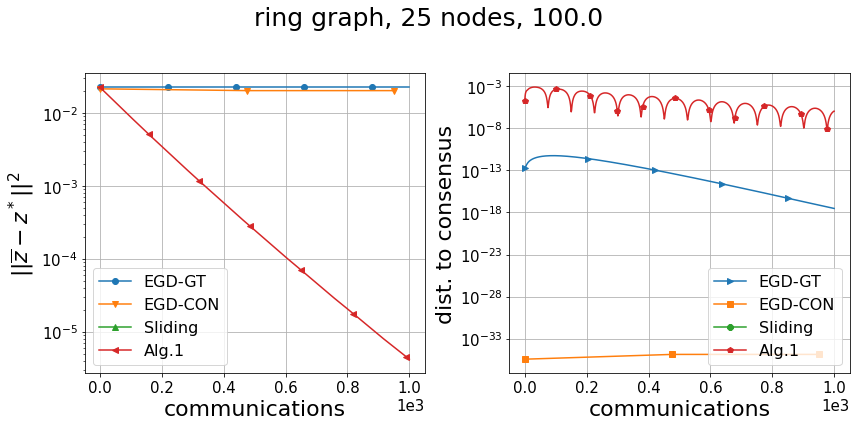

/home/michael/Documents/DistributedOpt/Experiments/data_sim/experiment/plotting.py:168: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim((0, min_comm))


In [11]:
run_experiment(
    adj_mat=adj_mat,
    gos_mat=gos_mat,
    num_nodes=num_nodes,
    datasets=noises,
    labels=labels,
    method_names=method_names,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    num_iter_solution=num_iter_solution,
    max_time_solution=max_time_solution,
    tolerance_solution=tolerance_solution,
    comm_budget_experiment=comm_budget_experiment,
    experiment_type="synthetic",
    get_A_b=get_A_b,
)

# Optimal parameters search

In [ ]:
graph = 'grid'
mix_mat = metropolis_weights(adj_mat[graph])
W = gos_mat[graph]

In [ ]:
def PS_run_algorithm_1(
    num_nodes: int,
    oracles: List[ArrayPair],
    L: float,
    mu: float,
    theta_factor: float,
    eta_factor: float,
    alpha_factor: float,
    z_0: ArrayPair,
    z_true: ArrayPair,
    gos_mat: np.ndarray,
    r_x: float,
    r_y: float,
    comm_budget_experiment: int,
):
    print(
        f"Running decentralized Algorithm 1 with theta: {theta_factor}, eta: {eta_factor}, alpha: {alpha_factor}..."
    )
    algorithm_1 = DecentralizedVIPAPCRunner(
        oracles=oracles,
        L=L,
        mu=mu,
        gos_mat=gos_mat,
        r_x=r_x,
        r_y=r_y,
        logger=LoggerDecentralized(z_true=z_true, g_true=g_true),
    )

    algorithm_1.compute_method_params()
    algorithm_1.theta *= theta_factor
    algorithm_1.eta *= eta_factor
    algorithm_1.alpha *= alpha_factor

    z_0_list = [z_0] * num_nodes
    y_0_list = [z_0] * num_nodes
    algorithm_1.create_method(z_0_list, y_0_list)
    algorithm_1.logger.comm_per_iter = 1
    algorithm_1.run(max_iter=comm_budget_experiment // algorithm_1.logger.comm_per_iter)

    return algorithm_1

In [ ]:
theta_factors = [5.0, 1.0, 0.001]
eta_factors = [5.0, 1.0, 0.001]
alpha_factors = [5.0, 1.0, 0.001]

In [ ]:
from tqdm import tqdm

In [ ]:
PS_labels = []
PS_methods = []
for theta_factor in tqdm(theta_factors, desc="Thetas"):
    for eta_factor in tqdm(eta_factors, desc="Etas"):
        for alpha_factor in tqdm(alpha_factors, desc="Alphas"):
            PS_labels.append(f"Theta: {theta_factor}, Eta: {eta_factor}, Alpha: {alpha_factor}")
            PS_methods.append(
                PS_run_algorithm_1(
                    num_nodes,
                    oracles,
                    L,
                    mu,
                    theta_factor,
                    eta_factor,
                    alpha_factor,
                    z_0,
                    z_true,
                    W,
                    r_x,
                    r_y,
                    comm_budget_experiment,
                )
            )

In [ ]:
batch_size = 3
cnt = 9
while cnt < len(PS_methods):
    plot_algorithms(
        graph,
        noises[0],
        PS_labels[cnt : min(cnt + batch_size, len(PS_labels))],
        PS_methods[cnt : min(cnt + batch_size, len(PS_methods))],
    )
    cnt += batch_size

In [ ]:
minimums = [min(method.logger.gradient_primal_distance_to_opt) for method in PS_methods]
maximums = [max(method.logger.gradient_primal_distance_to_opt) for method in PS_methods]

In [ ]:
min_value = min(minimums)
max_value = max(maximums)
min_value, max_value

In [ ]:
minimums.index(min_value)

In [ ]:
plot_algorithms(
    graph,
    noises[0],
    [PS_labels[minimums.index(min_value)]],
    [PS_methods[minimums.index(min_value)]],
    "gradient"
)